In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## 선형회귀 (Linear Regreesion)
먼저, 주어진 데이터를 직선을 사용해 모델링하는 방법을 살펴봅니다. 직선함수는 다음과 같습니다.

$$
y=a x+b
$$

여기서 $a$는 기울기(slope)이고 $b$는 $y$절편 (intercept) 라고합니다.

아래 그래프는 기울기가 2이고 절편이 -5인 직선으로 부터 생성된 데이터를 보여줍니다.

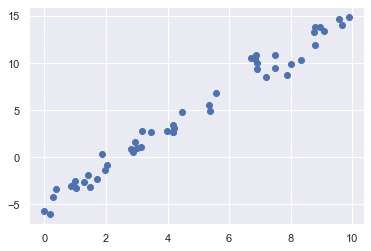

In [13]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x -5 + rng.randn(50)
plt.scatter(x,y);

In [14]:
rng.randn(50)

array([ 0.18656139,  0.41005165,  0.19829972,  0.11900865, -0.67066229,
        0.37756379,  0.12182127,  1.12948391,  1.19891788,  0.18515642,
       -0.37528495, -0.63873041,  0.42349435,  0.07734007, -0.34385368,
        0.04359686, -0.62000084,  0.69803203, -0.44712856,  1.2245077 ,
        0.40349164,  0.59357852, -1.09491185,  0.16938243,  0.74055645,
       -0.9537006 , -0.26621851,  0.03261455, -1.37311732,  0.31515939,
        0.84616065, -0.85951594,  0.35054598, -1.31228341, -0.03869551,
       -1.61577235,  1.12141771,  0.40890054, -0.02461696, -0.77516162,
        1.27375593,  1.96710175, -1.85798186,  1.23616403,  1.62765075,
        0.3380117 , -1.19926803,  0.86334532, -0.1809203 , -0.60392063])

scikit-learn의 `LinearRegression` estimator를 사용해서 위 데이터를 가장 잘 표현 할 수 있는 직선을 찾을 수 있습니다.

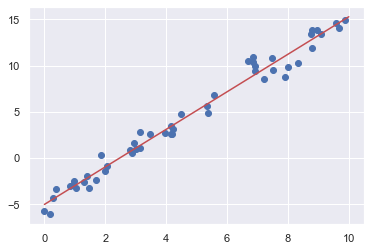

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit, color='r');

`LinearRegression(fit_intercept=True)` 에서 `fit_intercept`를 `True`로 설정한 이유는 $y$절편도 모델의 추정에 사용하기 위해서 옵션을 켜주었습니다.

`x[:, np.newaxis]` 에서 `newaxis`의 의미는 차원을 한차원 키워주는 의미를 지닙니다. 단순히 차원을 맞추기한 작업입니다. 

In [16]:
x[:, np.newaxis].shape

(50, 1)

In [17]:
x.shape

(50,)

모델이 학습이 끝난 후에는 매개변수(파라미터)들은 `model.{parameter_name}_` 의 형태로 저장됩니다. 기울기와 $y$절편은 아래와 같이 출력할 수 있습니다. 

In [18]:
print("Model slope:       ", model.coef_[0] ) # 리스트의 형태로 출력되기 떄문에
print("Model intercept:     ", model.intercept_)

Model slope:        2.027208810360695
Model intercept:      -4.998577085553202


In [19]:
model.coef_

array([2.02720881])

`LinearRegression` estimator는 위의 예제와 같은 1차원 입력뿐만 아니라 다차원 입력을 사용한 선형모델을 다룰 수 있습니다. 다차원 모델은 다음과 같은 형태를 가집니다. 

$$
y=a_{0}+a_{1} x_{1}+a_{2} x_{2}+\cdots
$$

기하학적으로 이것은 hyper-plane으로 데이터를 표현하는 것이라고 말할 수 있습니다.

In [20]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) # 100 x 3 행렬을 생성 -> 입력 데이터
y = 0.5 + np.dot(X, [1.5, -2., 1.]) # 입력데이터와 계수(가중치)의 앞에 0.5의 절편(intercept)를 더함

model.fit(X,y) # 입력데이터와 임의의 데이터 분포를 생석하여 회귀모형을 예측
print(model.intercept_)
print(model.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]


$y$ 값을은 랜덤하게 생성된 3차원 $x$값과 계수(가중치)들 `[1.5, 2., .1]`을 곱함으로써 생성되었는데 Linear Regression을 통해서 이 계수들을 계산 할 수 있다는 것을 확인 했습니다. 

하지만, 데이터가 선형적인 관계를 가지고 있지 않나면 어떻할 까요?

## 선형 기저함수 모델(Linear Basis Function Models)
비선형 데이터를 선형함수로 모델링하는 한가지 방법은 기저함수(basis function)을 이용하는 것입니다. 

예를 들어, 다음과 같은 선형함수를 사용한다고 해봅시다.

$$
y=a_{0}+a_{1} x_{1}+a_{2} x_{2}+a_{3} x_{3}+\cdots
$$

여기서, $x_{1}, x_{2}, x_{3}$ 등을 1차원 $x$로 부터 생성할수 있습니다. $\left(x_{n}=f_{n}(x)\right) . f_{n}$ 를 여기서 기저함수(basis function)이라고 부릅니다. 

만약 $f_{n}(x)=x^{n}$ 이라는 기저함수를 사용하면 최종적인 모델은 다음과 같습니다.

$$
y=a_{0}+a_{1} x+a_{2} x^{2}+a_{3} x^{3}+\cdots
$$

이 모델은 여전기 계수(가중치) $a_{n}$에 관해서는 선형함수임을 기억해야 합니다. 따라서, 1차원 변수인 $x$를 기저함수를 통해 다차원으로 확장시킴으로써 우리는 여전히 선형모델을 사용할 수있게 됩니다. 즉, 입력 벡터들은 고차원을으로 입력할 수 있지만 가중치들은 여전히 1차원으로 두도 이를 다차원이 기저인 선형 회귀를 푼다고 생각하는 것입니다. 

## 다항 기저함수(Polynomial Basis Functions)

$f_{n}(x)=x^{n}$ 형태의 함수를 다항 기저함수 (Polynomial functions)라고 부릅니다. Scikit-Learn은 `polynomialFeatures`라는 transfomer를 이미 포함하고 있습니다.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False) # 차원으로 확장
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

위 코드를 통해 우리는 `[2,3,4]`라는 리스트를 위와같이 3차원의 데이터로 확장 할 수 있습니다.

이번에는 7차원 변환을 적용해 봅시다. 이번에는 `scikit-learn`의 `pipelne`을 사용해서 이를 구현 해 봅시다.

In [22]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), # 데이터 변환
                          LinearRegression()) # 데이터 변화에 대해 모델링

이러한 다차원 변환을 통해서 복잡한 데이터를 모델링 할 수 있게 됩니다. 예를 들어 `sin` 함수를 사용해서 데이터를 생성하고 이를 모델링 해봅시다.

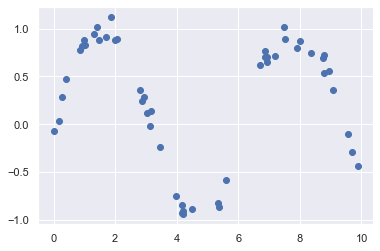

In [23]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50) # 두번째 항은 노이즈를 의미
plt.scatter(x,y);

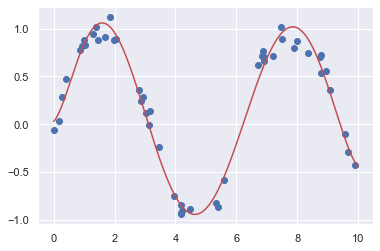

In [24]:
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit, color='r');

## 가우시안 기저함수(Gaussian Basis Functions)

다항 기저함수 외에 다른 기저함수도 존재 합니다. 가우시안 기저함수는 다음과 같습니다.

$$
\exp \left\{-\frac{\left(x-u_{j}\right)^{2}}{2 s^{2}}\right\}
$$

- $u_{j}$는 함수의 위치
- $S$ 분산은 분포의 폭을 결정합니다.

주어진 데이터를 여러 개의 가우시안 기저함수들의 함으로 표현하려고 시도 할 수 있습니다. 

다음 그림과 같이 입력 벡터에 대한 기저함수를 가우시안 분포를 표현 할 수 있습니다. 각 분포의 크기는 함수의 가중치(계수)의 차이에 의해 크고 작음을 나타낼 수 있습니다. 

![](https://chengjunwang.com/mybook/_images/05.06-gaussian-basis.png)

가우시안 기저함수 사용은 `scikit-learn`에서 제공하지 않기 때문에 우리가 직접 만들어서 사용해야 합니다. 

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    def __init__(self, N, sigma_factor=2.0):
        self.N = N
        self.sigma_factor = sigma_factor
    
    @staticmethod
    def _gauss_basis(x, mu, sigma, axis=None):
        arg = (x - mu) / sigma
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.mu_ = np.linspace(X.min(), X.max(), self.N)
        print(self.mu_)

        self.sigma_ = self.sigma_factor * (self.mu_[1] - self.mu_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.mu_,
                                 self.sigma_, axis=1)

[1.14374817e-03 3.42090891e-01 6.83038034e-01 1.02398518e+00
 1.36493232e+00 1.70587946e+00 2.04682660e+00 2.38777375e+00
 2.72872089e+00 3.06966803e+00 3.41061518e+00 3.75156232e+00
 4.09250946e+00 4.43345660e+00 4.77440375e+00 5.11535089e+00
 5.45629803e+00 5.79724518e+00 6.13819232e+00 6.47913946e+00
 6.82008660e+00 7.16103375e+00 7.50198089e+00 7.84292803e+00
 8.18387518e+00 8.52482232e+00 8.86576946e+00 9.20671660e+00
 9.54766375e+00 9.88861089e+00]


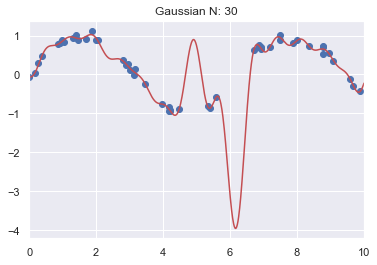

In [71]:
n = 30
gauss_model = make_pipeline(GaussianFeatures(n),
                           LinearRegression())

gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit, color='r')
plt.title('Gaussian N: ' +str(n))
plt.xlim(0,10);

In [47]:
gauss = GaussianFeatures(30)
gauss.fit(x[:, np.newaxis])


[1.14374817e-03 3.42090891e-01 6.83038034e-01 1.02398518e+00
 1.36493232e+00 1.70587946e+00 2.04682660e+00 2.38777375e+00
 2.72872089e+00 3.06966803e+00 3.41061518e+00 3.75156232e+00
 4.09250946e+00 4.43345660e+00 4.77440375e+00 5.11535089e+00
 5.45629803e+00 5.79724518e+00 6.13819232e+00 6.47913946e+00
 6.82008660e+00 7.16103375e+00 7.50198089e+00 7.84292803e+00
 8.18387518e+00 8.52482232e+00 8.86576946e+00 9.20671660e+00
 9.54766375e+00 9.88861089e+00]


GaussianFeatures(N=30)

In [46]:
x.shape

(50,)

## 규제화(Regularization)
기저함수를 사용함으로써 복잡한 데이터를 모델링 할 수 있게 되었지만, 조심하지 않는다면 over-fiting이라는 문제를 맞이 할 수 있습니다. 때문에 이를 일반화 할 수 있는 규제화 방법을 사용해야 합니다.

### 과적합(over-fiting)
모형이 특정 샘플링에 과도하게 최적화하는 것을 과적합이라고 합니다. 과적합은 다음과 같은 상화에서 발생합니다.

- 독립 변수 데이터 갯수에 비해 추정하고자 하는 계수(가중치, 파라미터)의 수가 과도하게 많거나
- 독립 변수 데이터가 서로 독립이 아닌 경우 

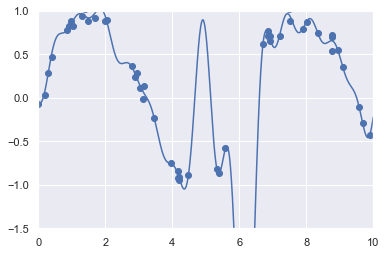

In [27]:
model = make_pipeline(GaussianFeatures(30),
                     LinearRegression())

model.fit(x[:, np.newaxis], y)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit)

plt.xlim(0,10)
plt.ylim(-1.5, 1,5);

너무 큰 차원을 예측하게 되면 위와 같이 데이터에 민감한 함수를 근사하게 됩니다. 때문에 이를 방치하지 위해 손실함수 혹은 에러 함수에 규제 즉, 최적점을 찾는 것에 제약을 두어 적은 스칼라 배만큼 최적점을 찾게 하는 것입니다. 

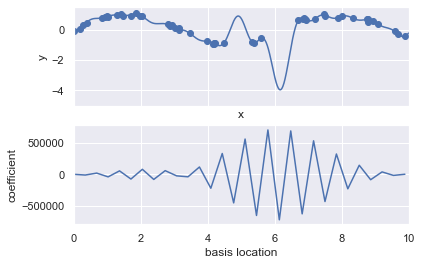

In [28]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].mu_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

위의 그래프애서는 가우스 기저함수를 입력 벡터로 사용했을 때의 근사식을 보여주는 것이고, 아래의 그림은 근사한 모델의 계수(가중치)를 보여주고 있습니다. 즉, 차원이 커질 수록(데이터가 복잡해질 수록) 계수의 크기는 증가하여 데이터의 차원을 최대한 표현 하고자 하는 것이지요.

이러한 오버피팅(과도하게 다차원 데이터에 민감하게 반응하는) 현상을 극복하기 위해 큰 계수값(가중치)에 penalty를 부여해서 overfiting을 어느정도 극복할 수 있습니다. 이러한 penalty를 regularization이라고 합니다.

## Ridge regression ($L_2$ Regularization)

가장 자주 쓰이는 형태의 regularization은 릿지 회귀(L2 규제화) 이고 다음과 같이 정의 됩니다.

$$
P=\alpha \sum_{n=1}^{N} \theta_{n}^{2}
$$

여기서 $\alpha$는 regularization의 강도를 조절하는 하이퍼 파라미터입니다. 여기서 $\theta$의 의미는 회귀식의 계수(가중치)들을 의미합니다. 즉, 모든 계수들에 대해 일정량의 스칼라배를 해주는 것이지요. 

또한, $\alpha$값이 0에 가까워 질수록 규체화의 강도가 세지기 때문에 각 입력벡터에 대한 계수의 크기가 작아집니다. 때문에 기울기 값이 직선의 형태에 가까워 지게 되고 이는 결과적으로 전체적인 모델의 모양이 선형의 모양으로 근사 하게 됩니다. 하지만, $\alpha$이 무한히 커지게 된다면 데이터는 모델에 영향을 줄수 없게 됩니다. 다말하면 계수 값이 너무커서 입력데이터의 영향력이 사라지게 되는 것이지요. 

이를 요약하면, $\alpha$ 를 크게하면 입력 데이터의 표현력이 사라지고, $\alpha$를 작게하면 입력 데이터의 표현력이 크게 살아납니다. 

이 형태의 regularization은 scikit-learn의 `Ridge` estimator 에서 사용됩니다.

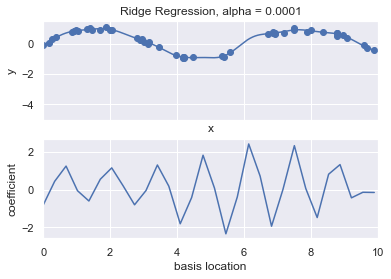

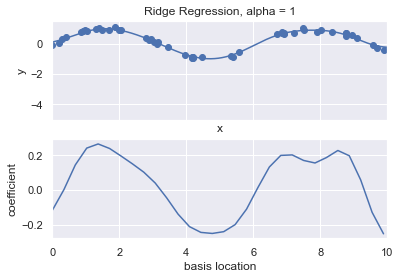

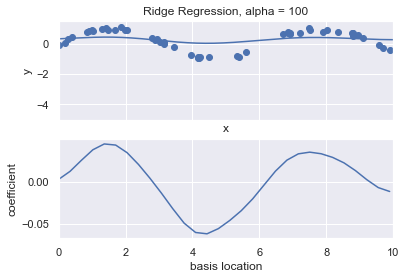

In [29]:
from sklearn.linear_model import Ridge

for a in [0.0001, 1, 100]:
    model = make_pipeline(GaussianFeatures(30), Ridge(alpha=a))
    basis_plot(model, title='Ridge Regression, alpha = ' + str(a))

## Lasso Regression($L_1$ regularization)

또 하나 자주쓰이는 정규화 방식은 계수들의 절대값으로 계수를 제한하는 방식입니다.

$$
P=\alpha \sum_{n=1}^{N}\left|\theta_{n}\right|
$$

이러한 방식을 나중에 다루겠지만, sparse 한 모델을 생성하게 됩니다. 즉 많은 계수들이 0이 된다는 뜻이죠

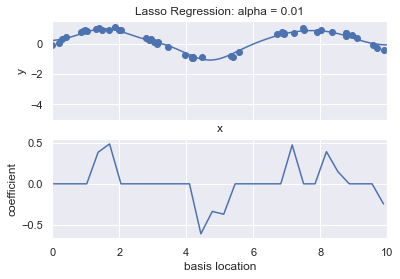

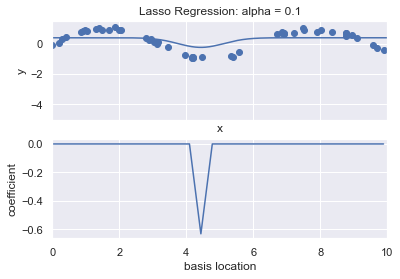

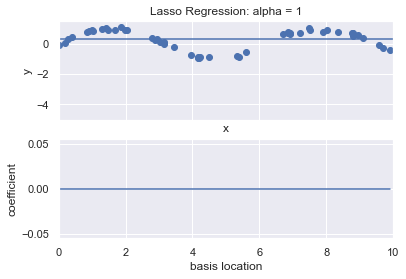

In [30]:
from sklearn.linear_model import Lasso
for a in [0.01, 0.1, 1]:
    model = make_pipeline(GaussianFeatures(30), Lasso(alpha=a))
    basis_plot(model, title='Lasso Regression: alpha = ' + str(a))

위의 결과의 계수값들을 살펴 보면 규제화의 크기가 커질 수록 계수값들이 0이 많아 지게 됩니다. 즉, sparse한 모델이 만들어 진다든 것이지요.